<center>

# **Proyecto**

</center>

---

### **Descripción del Problema:**

El **proyecto** de la materia de **Diseño y Análisis de Algoritmos** consiste en **realizar** un **algoritmo** que dado un **conjunto aleatorio de puntos** situados en un **plano bidimensional** pueda **dividir** a la **mitad** el **conjunto de puntos**, además debe de **determinar** el **conjunto de puntos** que permita "**encapsular**" a los **demás puntos** a través de un **polígono convexo**.

---

### **Algoritmos Geométricos**

+ Los **algoritmos geométricos** son **algoritmos diseñados** para **resolver problemas relacionados** con la **geometría**, que es la **rama** de las **matemáticas** que **estudia** las **propiedades y las relaciones de las figuras en el espacio**, algunos algoritmos geométricos son los siguientes:
    1. **Algoritmo** de la **Intersección** entre **Segmentos de Línea**.
    2. **Algoritmo** del **Producto Cruz**.
    3. **Algoritmo** del **Punto** **Dentro** de un **Polígono**.
    4. **Algoritmo** de la **Envolvente Convexa**.
    5. **Algoritmo** de la **Línea** de **Barrido**.
    6. **Algoritmo** de **Voronoi**.
    7. **Algoritmo** de **Triangulación** de **Delaunay**.
    8. **Algoritmo** de **Recorte** de **Cohen-Sutherland**.
    9. **Algoritmo** de **Relleno** de **Polígonos**.

---

### **Convex Hull (QuickHull) Algorithm**

+ El **Algoritmo** de la **Envolvente Convexa** (**Convex Hull**) es un **algoritmo geométrico** que **encuentra** el **polígono convexo más pequeño** que **contiene** un **conjunto de puntos en el plano**. La **envolvente convexa** es el **límite convexo** alrededor de **esos puntos**.

#### **Convex Hull (QuickHull) Algorithm en Lenguaje Natural**

1. **Encontrar los puntos extremos:** El algoritmo comienza encontrando los puntos extremos del conjunto de puntos. Esto implica encontrar el punto más a la izquierda y el punto más a la derecha.

2. **Dividir los puntos:** Una vez que se han identificado los puntos extremos, se divide el conjunto de puntos en dos subconjuntos. Uno de los subconjuntos estará formado por los puntos que se encuentran a la izquierda de la línea que conecta los puntos extremos, y el otro subconjunto contendrá los puntos a la derecha de esta línea.

3. **Encontrar el punto más alejado:** A continuación, se encuentra el punto del conjunto que está más alejado de la línea que conecta los puntos extremos. Este punto se convierte en un vértice del polígono convexo.

4. **Construir recursivamente:** Se realiza una llamada recursiva al algoritmo en cada uno de los subconjuntos generados en el paso anterior. Esto se hace para construir la envolvente convexa de los puntos a la izquierda de la línea y la envolvente convexa de los puntos a la derecha de la línea.

5. **Combinar las envolventes convexas:** Una vez que se han obtenido las envolventes convexas de ambos subconjuntos, se combinan para formar la envolvente convexa final. Esto implica agregar los vértices obtenidos en los pasos anteriores a la envolvente convexa resultante.

6. **Terminar:** El algoritmo finaliza cuando se han procesado todos los puntos y se ha construido el polígono convexo completo.

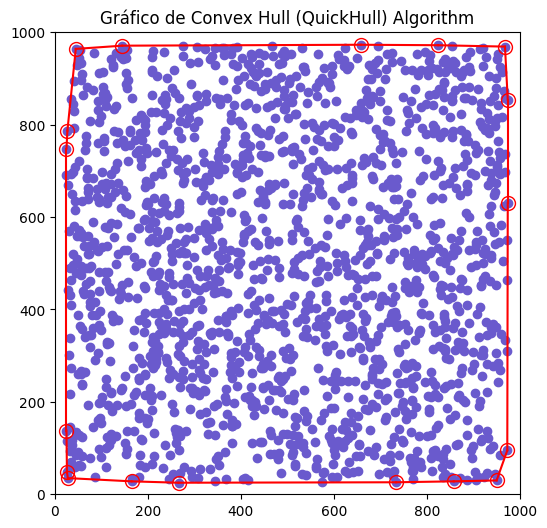

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

points = np.random.randint(25, 975, size=(1750,2))
hull = ConvexHull(points)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(points[:,0], points[:,1], 'o', color='slateblue', label='Puntos')
for simplex in hull.simplices:
    ax.plot(points[simplex,0], points[simplex,1], 'r-')
ax.plot(points[hull.vertices,0], points[hull.vertices,1], 'o', mec='r', color='none', lw=1, markersize=10, label='Cierre Convexo')

ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])

plt.title('Gráfico de Convex Hull (QuickHull) Algorithm')
plt.show()

---

### **Splitting (K-means) Algorithm**

+ El **Algoritmo** de **K-means** es un **algoritmo** de **clustering** ampliamente utilizado para **agrupar** un **conjunto de puntos** en **K grupos** o **clusters**, **donde K** es un **número predefinido**.

#### **Splitting (K-means) Algorithm en Lenguaje Natural**

1. **Inicialización:** Selecciona K puntos iniciales como centroides. Estos puntos pueden elegirse de forma aleatoria o utilizando algún criterio específico, como seleccionar los K puntos más distantes entre sí.
2. **Asignación de puntos a centroides:** Asigna cada punto del conjunto de datos al centroide más cercano. Esto se hace calculando la distancia entre cada punto y todos los centroides y asignando el punto al centroide con la distancia más corta. La distancia comúnmente utilizada es la distancia euclidiana.
3. **Actualización de centroides:** Una vez que todos los puntos han sido asignados a los centroides, se calcula el nuevo centroide de cada cluster como el promedio de los puntos asignados a ese centroide. Esto implica calcular la media de las coordenadas de los puntos en cada cluster.
4. **Repetición de pasos 2 y 3:** Los pasos de asignación y actualización se repiten iterativamente hasta que se cumpla algún criterio de convergencia. Esto suele ser cuando los centroides dejan de cambiar significativamente o cuando se alcanza un número máximo de iteraciones.
5. **Resultado:** Una vez que el algoritmo ha convergido, se obtiene el resultado final. Esto consiste en los clusters formados, donde cada cluster es una colección de puntos asignados a un centroide específico.

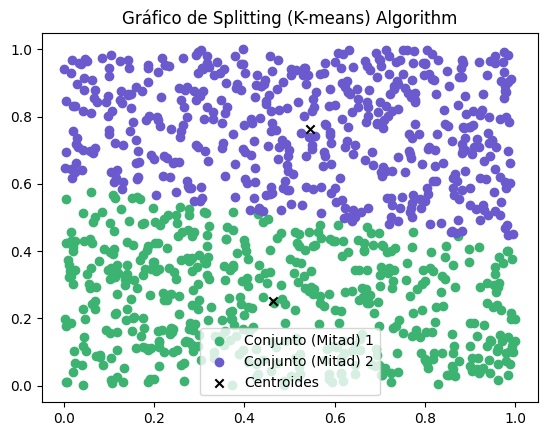

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def splitting_algorithm(puntos, k):
    # Inicializar los centroides de forma aleatoria
    centroides = puntos[np.random.choice(len(puntos), k, replace=False)]
    
    # Repetir el proceso hasta convergencia
    convergido = False
    while not convergido:
        # Asignar cada punto al centroide más cercano
        clusters = [[] for _ in range(k)]
        for punto in puntos:
            distancias = [np.linalg.norm(punto - centroide) for centroide in centroides]
            centroide_mas_cercano = np.argmin(distancias)
            clusters[centroide_mas_cercano].append(punto)
        
        # Calcular los nuevos centroides como el promedio de los puntos en cada cluster
        nuevos_centroides = [np.mean(cluster, axis=0) for cluster in clusters]
        
        # Comprobar si los centroides han convergido
        if np.allclose(centroides, nuevos_centroides):
            convergido = True
        else:
            centroides = nuevos_centroides
    
    return clusters, centroides

# Generar un conjunto de puntos aleatorios utilizando NumPy
np.random.seed(0)
num_puntos = 1000
puntos = np.random.rand(num_puntos, 2)

# Aplicar el algoritmo de partición a los puntos
k = 2
clusters, centroides = splitting_algorithm(puntos, k)
centroides = np.array(centroides)

# Graficar los puntos y los centroides
colores = ['mediumseagreen', 'slateblue', 'chartreuse']
for i, cluster in enumerate(clusters):
    puntos_cluster = np.array(cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1], color=colores[i], label=f'Grupo (Mitad) {i+1}')
plt.scatter(centroides[:, 0], centroides[:, 1], color='k', marker='x', label='Centroides')
plt.legend()
plt.title('Gráfico de Splitting (K-means) Algorithm')
plt.show()


---

### **Convex Hull and Splitting Algorithm**

+ **Según** la **descripción del problema** que **plantea** el **proyecto**, el **código implementado a continuación cumple** con los **requisitos establecidos** en dicho **proyecto**: 

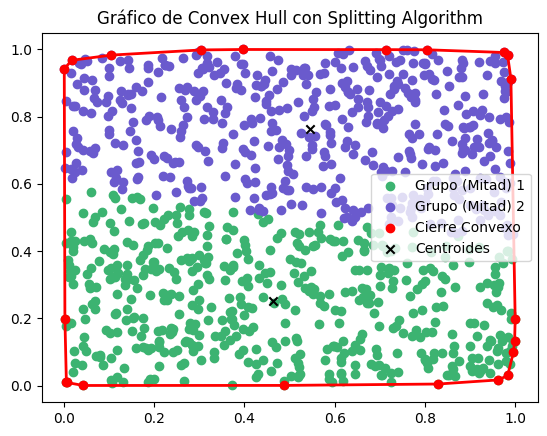

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def algoritmo_particion(puntos, k):
    # Inicializar los centroides de forma aleatoria
    centroides = puntos[np.random.choice(len(puntos), k, replace=False)]
    
    # Repetir el proceso hasta convergencia
    convergido = False
    while not convergido:
        # Asignar cada punto al centroide más cercano
        clusters = [[] for _ in range(k)]
        for punto in puntos:
            distancias = [np.linalg.norm(punto - centroide) for centroide in centroides]
            centroide_mas_cercano = np.argmin(distancias)
            clusters[centroide_mas_cercano].append(punto)
        
        # Calcular los nuevos centroides como el promedio de los puntos en cada cluster
        nuevos_centroides = [np.mean(cluster, axis=0) for cluster in clusters]
        
        # Comprobar si los centroides han convergido
        if np.allclose(centroides, nuevos_centroides):
            convergido = True
        else:
            centroides = nuevos_centroides
    
    return clusters, centroides

# Generar un conjunto de puntos aleatorios utilizando NumPy
np.random.seed(0)
num_puntos = 1000
puntos = np.random.rand(num_puntos, 2)

# Aplicar el algoritmo de partición a los puntos
k = 2
clusters, centroides = algoritmo_particion(puntos, k)

# Convertir centroides a un array NumPy
centroides = np.array(centroides)

# Calcular el cierre convexo de los puntos
hull = ConvexHull(puntos)
indices_cierre_convexo = hull.vertices
puntos_cierre_convexo = puntos[indices_cierre_convexo]

# Obtener las coordenadas de la línea del cierre convexo
linea_cierre_convexo = np.vstack((puntos_cierre_convexo, puntos_cierre_convexo[0]))

# Graficar los puntos y los centroides
colores = ['mediumseagreen', 'slateblue', 'chartreuse']
for i, cluster in enumerate(clusters):
    puntos_cluster = np.array(cluster)
    plt.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1], color=colores[i], label=f'Grupo (Mitad) {i+1}')

# Graficar los puntos del cierre convexo con otro color
plt.scatter(puntos_cierre_convexo[:, 0], puntos_cierre_convexo[:, 1], color='red', label='Cierre Convexo')

# Graficar la línea del cierre convexo
plt.plot(linea_cierre_convexo[:, 0], linea_cierre_convexo[:, 1], color='red', linewidth=2)

plt.scatter(centroides[:, 0], centroides[:, 1], color='k', marker='x', label='Centroides')
plt.legend()
plt.title('Gráfico de Convex Hull con Splitting Algorithm')
plt.show()


---